In [2]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
from ipywidgets import interact, interactive, fixed, interact_manual
import contextily as ctx
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Visualizando a Pandemia

## Baixando a Base Cartográfica

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Baixando os dados globais de casos Confirmados

In [ ]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_mundo = pd.merge(world,confirmed, left_on='name', right_on='Country/Region')

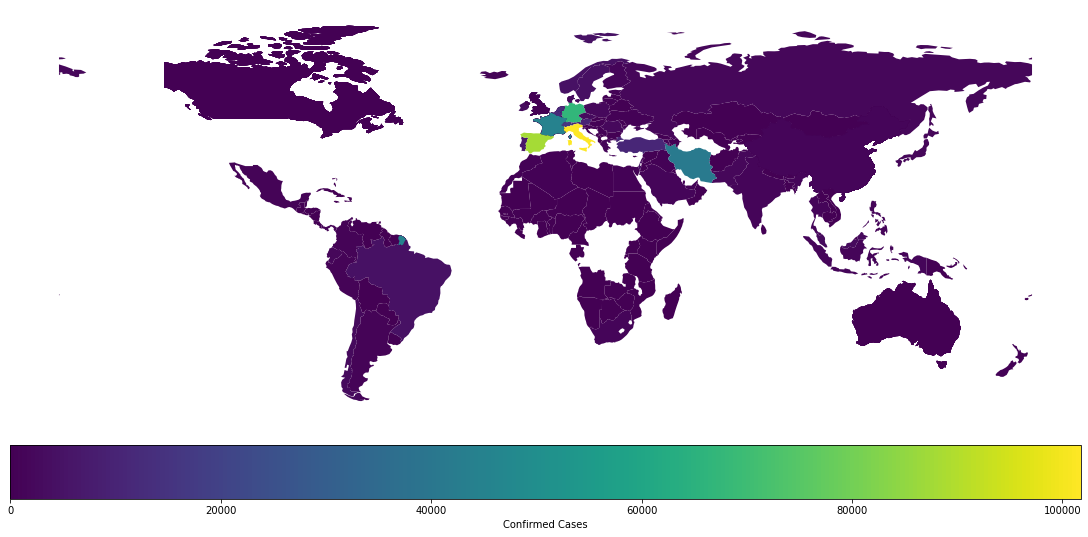

In [14]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
confirmed_mundo.plot(ax=ax,column='3/30/20', legend=True, 
                     legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'});
ax.set_axis_off()

## Baixando os dados globais de mortes pela COVID-19

In [4]:
mortes = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# mortes['geometry'] = [Point(row.Long, row.Lat) for i,row in mortes.iterrows()]
# mortes_geo = gpd.GeoDataFrame(mortes)
# mortes_geo

In [ ]:
mortes_mundo = pd.merge(world,mortes, left_on='name', right_on='Country/Region')

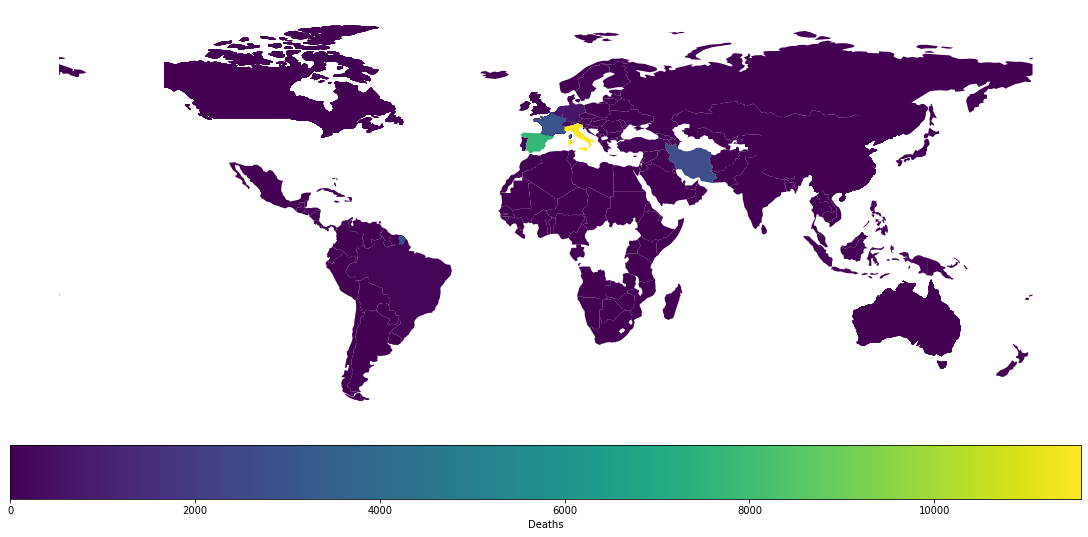

In [18]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
mortes_mundo.plot(ax=ax,column='3/30/20', legend=True,
                 legend_kwds={'orientation':'horizontal', 'label':'Deaths'});
ax.set_axis_off()

In [23]:
from datetime import datetime
start_date = datetime(2020, 1, 22)
end_date = datetime(2020, 3, 30)

dates = pd.date_range(start_date, end_date, freq='D')

options = [date.strftime('%-m/%-d/%y') for date in dates]

selection_slider = widgets.SelectionSlider(
    options=options,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

@interact(date=selection_slider)
def plot_conf_cases(date):
    fig,ax = plt.subplots(1, 1, figsize=(15,15))
    last_date = date
    if date in confirmed_mundo.columns:
        confirmed_mundo.plot(ax=ax, column=date, markersize=confirmed_mundo[date], 
                             alpha=.5, legend=True,
                             legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'}
                            );
        last_date = date
    else:
        confirmed_mundo.plot(ax=ax, column=last_date, 
                           markersize=np.log(confirmed_mundo[last_date].values), 
                           alpha=.5,
                          legend=True,
                            legend_kwds={'orientation':'horizontal', 'label':'Casos Confirmados'});
#     ctx.add_basemap(ax)
    ax.set_axis_off()
   

interactive(children=(SelectionSlider(description='Dates', layout=Layout(width='500px'), options=('1/22/20', '…